In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
%load_ext autoreload
import astropy.units as units
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sparse
from madart.sample import sample
plt.style.use("mls_scf")

In [3]:
%autoreload 2
import dualpy as dp

In [4]:
n = 2048
t = np.arange(n) * units.s
omega = 2*np.pi * units.rad * 10 / (n*units.s)
omega = dp.seed(omega, "omega")
a = 1.0 * units.m
a = dp.seed(a, "a")
x = a * np.sin(omega * t)

In [5]:
ts = np.arange(0, n, 16) * units.s + 0.5 * units.s
xs = sample(x, [t], [ts])

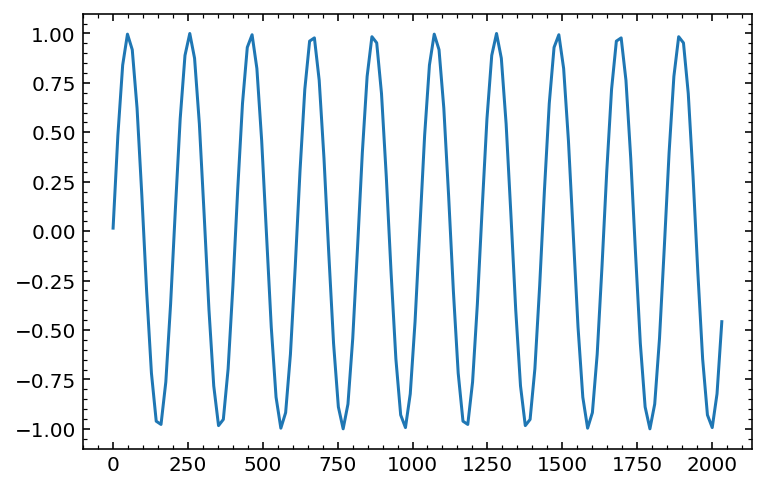

In [6]:
plt.plot(ts,xs.jacobians["a"].todensearray())

In [7]:
y_conventional = xs ** 2

In [8]:
stash = dp.Stash()
xs_stashed = stash.record_and_reseed(xs, "stash")
y_stashed = xs_stashed ** 2
y_test = stash.unstash(y_stashed)

In [9]:
type(y_test)

dualpy.duals.dlarray

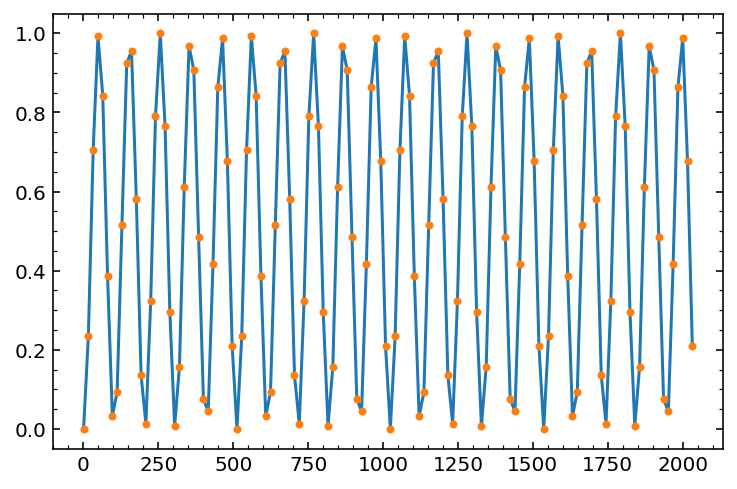

In [10]:
plt.plot(ts, y_conventional)
plt.plot(ts, y_test, '.')
plt.show();

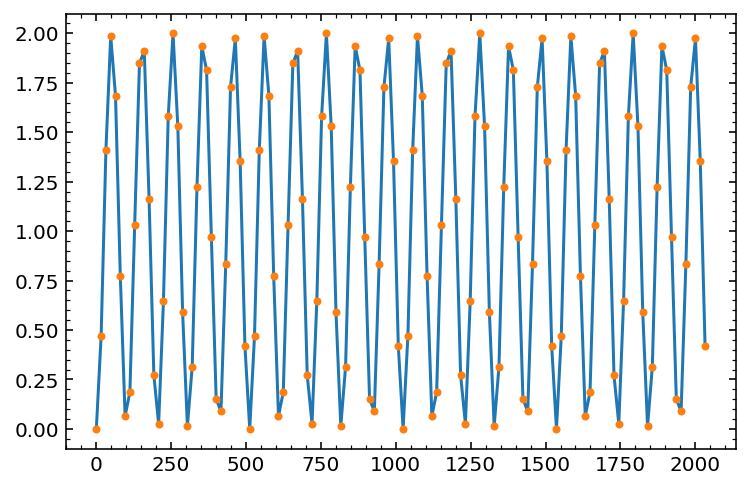

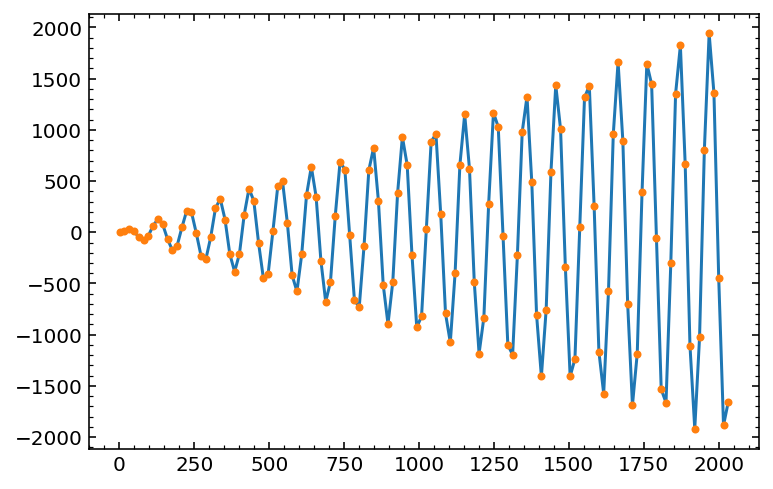

In [11]:
for key in y_conventional.jacobians.keys():
    fig, ax = plt.subplots()
    plt.plot(ts, y_conventional.jacobians[key].todensearray())
    plt.plot(ts, y_test.jacobians[key].todensearray(), ".")
    plt.show();